# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
filepath = '/workspaces/2025-Phase-2/data-science/2. Machine Learning Project/Summary of Weather.csv'
df = pd.read_csv(filepath)
# Display the first few rows of the dataset
df.head()


/tmp/ipykernel_7773/271255126.py:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()
# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

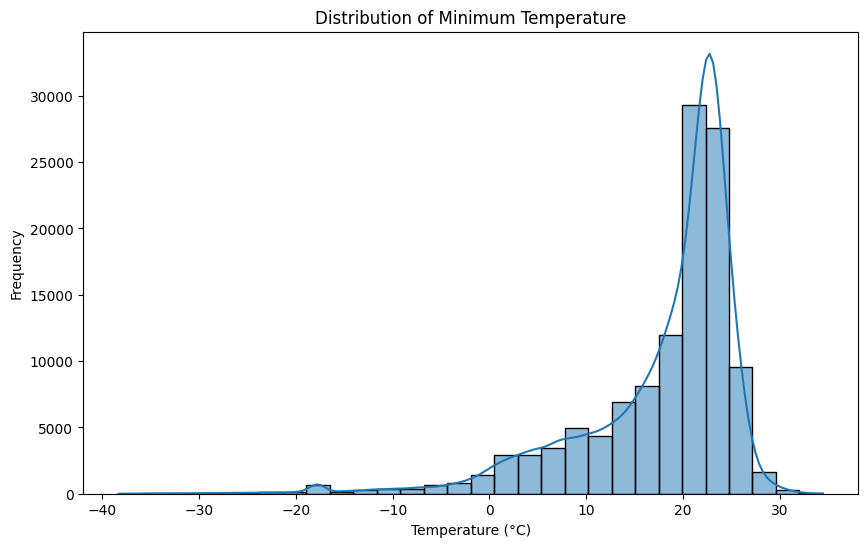

In [ ]:
print(df.describe())
# Visualize the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['MinTemp'], bins=30, kde=True)
plt.title('Distribution of Minimum Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

## 2. Clean the dataset, drop variables

In [ ]:
# Define a threshold for dropping columns based on missing values
# Drop columns that are more than 99% empty
threshold = len(df) * 0.01
df.dropna(axis='columns', thresh=threshold, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   MaxTemp      119040 non-null  float64
 4   MinTemp      119040 non-null  float64
 5   MeanTemp     119040 non-null  float64
 6   Snowfall     117877 non-null  object 
 7   PoorWeather  34237 non-null   object 
 8   YR           119040 non-null  int64  
 9   MO           119040 non-null  int64  
 10  DA           119040 non-null  int64  
 11  PRCP         117108 non-null  object 
 12  MAX          118566 non-null  float64
 13  MIN          118572 non-null  float64
 14  MEA          118542 non-null  float64
 15  SNF          117877 non-null  object 
 16  SND          5563 non-null    float64
 17  TSHDSBRSGF   34237 non-null   object 
dtypes: float64(7), int64(4),

In [ ]:
# Drop the 'MeanTemp' column to prevent data leakage
if 'MeanTemp' in df.columns:
    df.drop('MeanTemp', axis=1, inplace=True)
    print("Dropped 'MeanTemp' column.")

Dropped 'MeanTemp' column.


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
print("Converted 'Date' column to datetime format.")

print("\nCreating cyclical features directly from 'Date' column...")
# Extract cyclical features from the 'Date' column
month = df['Date'].dt.month
day_of_year = df['Date'].dt.dayofyear

# Create cyclical features for month and day of the year
df['month_sin'] = np.sin(2 * np.pi * month / 12)
df['month_cos'] = np.cos(2 * np.pi * month / 12)
df['day_of_year_sin'] = np.sin(2 * np.pi * day_of_year / 365.25)
df['day_of_year_cos'] = np.cos(2 * np.pi * day_of_year / 365.25)

print("Cyclical features created: 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos'.")

# Drop the original 'Date', 'YR', 'MO', 'DA' columns
df.drop(['Date', 'YR', 'MO', 'DA'], axis=1, inplace=True)
print("Dropped the original 'Date', 'YR', 'MO', 'DA' columns.")

print("\nFinal DataFrame after preprocessing:")
print(df.head())




Converted 'Date' column to datetime format.

Creating cyclical features directly from 'Date' column...
Cyclical features created: 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos'.
Dropped the original 'Date', 'YR', 'MO', 'DA' columns.

Final DataFrame after preprocessing:
     STA Precip    MaxTemp    MinTemp Snowfall PoorWeather  PRCP   MAX   MIN  \
0  10001  1.016  25.555556  22.222222      0.0         NaN  0.04  78.0  72.0   
1  10001      0  28.888889  21.666667      0.0         NaN     0  84.0  71.0   
2  10001   2.54  26.111111  22.222222      0.0         NaN   0.1  79.0  72.0   
3  10001   2.54  26.666667  22.222222      0.0         NaN   0.1  80.0  72.0   
4  10001      0  26.666667  21.666667      0.0         NaN     0  80.0  71.0   

    MEA  SNF  SND TSHDSBRSGF  month_sin  month_cos  day_of_year_sin  \
0  75.0  0.0  NaN        NaN       -0.5  -0.866025         0.010751   
1  78.0  0.0  NaN        NaN       -0.5  -0.866025        -0.006451   
2  76.0  0.0  NaN  

In [ ]:
df.head()

,STA,Precip,MaxTemp,MinTemp,Snowfall,PoorWeather,PRCP,MAX,MIN,MEA,SNF,SND,TSHDSBRSGF,month_sin,month_cos,day_of_year_sin,day_of_year_cos
0,10001,1.016,25.555556,22.222222,0.0,NaN,0.04,78.0,72.0,75.0,0.0,NaN,NaN,-0.5,-0.866025,0.010751,-0.999942
1,10001,0,28.888889,21.666667,0.0,NaN,0,84.0,71.0,78.0,0.0,NaN,NaN,-0.5,-0.866025,-0.006451,-0.999979
2,10001,2.54,26.111111,22.222222,0.0,NaN,0.1,79.0,72.0,76.0,0.0,NaN,NaN,-0.5,-0.866025,-0.023651,-0.999720
3,10001,2.54,26.666667,22.222222,0.0,NaN,0.1,80.0,72.0,76.0,0.0,NaN,NaN,-0.5,-0.866025,-0.040844,-0.999166
4,10001,0,26.666667,21.666667,0.0,NaN,0,80.0,71.0,76.0,0.0,NaN,NaN,-0.5,-0.866025,-0.058026,-0.998315


In [ ]:
# Convert 'Precip' column to numeric, replacing 'T' with 0.01
df['Precip'] = df['Precip'].replace('T', 0.01)
df['Precip'] = pd.to_numeric(df['Precip'], errors='coerce')

df['PRCP'] = df['PRCP'].replace('T', 0.01)
df['PRCP'] = pd.to_numeric(df['PRCP'], errors='coerce')

print("Number of NaNs created during conversion:")
print(df[['Precip', 'PRCP']].isnull().sum())

# Fill newly created NaNs with 0
df['Precip'].fillna(0, inplace=True)
df['PRCP'].fillna(0, inplace=True)
print("\nFilled newly created NaNs with 0.")

Number of NaNs created during conversion:
Precip       0
PRCP      1932
dtype: int64

Filled newly created NaNs with 0.


/tmp/ipykernel_7773/324863508.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip'].fillna(0, inplace=True)
/tmp/ipykernel_7773/324863508.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
# Display 'Precip', 'PRCP' correlation matrix after cleaning
print("\n--- Correlation Matrix (after cleaning) ---")
print(df[['Precip', 'PRCP']].corr())


--- Correlation Matrix (after cleaning) ---
         Precip     PRCP
Precip  1.00000  0.99997
PRCP    0.99997  1.00000


In [ ]:
# Check if 'Precip' column exists and drop it if it does
if 'Precip' in df.columns:
    df.drop('Precip', axis=1, inplace=True)
    print("Dropped the 'Precip' column to avoid redundancy with 'PRCP'.")

Dropped the 'Precip' column to avoid redundancy with 'PRCP'.


In [ ]:
# Convert 'Snowfall', 'SNF', and 'SND' columns to numeric, replacing 'null' with 0
df['Snowfall'].fillna(0, inplace=True)
df['Snowfall'] = pd.to_numeric(df['Snowfall'], errors='coerce')

df['SNF'].fillna(0, inplace=True)
df['SNF'] = pd.to_numeric(df['SNF'], errors='coerce')

df['SND'].fillna(0, inplace=True)
df['SND'] = pd.to_numeric(df['SND'], errors='coerce')

# Check for correlation between 'Snowfall' and 'SNF'
df[['Snowfall', 'SNF']].corr()


/tmp/ipykernel_7773/2038076072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Snowfall'].fillna(0, inplace=True)
/tmp/ipykernel_7773/2038076072.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,Snowfall,SNF
Snowfall,1.0,1.0
SNF,1.0,1.0


In [ ]:
df.drop('Snowfall', axis=1, inplace=True)

In [ ]:
# --- Target Encoding ---
# Calculate the mean MinTemp for each station
target_map = df.groupby('STA')['MinTemp'].mean()

# Map this mean value back to the STA column
df['STA_target_encoded'] = df['STA'].map(target_map)

# Drop the original STA column
df.drop('STA', axis=1, inplace=True)

print("Target Encoding applied to 'STA' column.")
print(df[['STA_target_encoded', 'MinTemp']].head())

Target Encoding applied to 'STA' column.
   STA_target_encoded    MinTemp
0           22.520407  22.222222
1           22.520407  21.666667
2           22.520407  22.222222
3           22.520407  22.222222
4           22.520407  21.666667


In [ ]:
print("--- Processing 'PoorWeather' column with a robust strategy ---")

if 'PoorWeather' in df.columns:
    # First, fill NaN with a value that signifies "no poor weather", like 0.
    df['PoorWeather'] = df['PoorWeather'].fillna(0)
    
   
    # The logic is: if the value is 0, '0', or was originally NaN (now 0), it's 0.
    # ANY other value ('1', '1 1', '1000', 1.0, etc.) means there was poor weather, so it becomes 1.
    df['PoorWeather'] = df['PoorWeather'].apply(lambda x: 0 if str(x) == '0' else 1)

    print("\n'PoorWeather' column cleaned. It is now a binary (0/1) feature.")
    print("Value counts after cleaning:")
    print(df['PoorWeather'].value_counts())
else:
    print("'PoorWeather' column not found.")

--- Processing 'PoorWeather' column with a robust strategy ---

'PoorWeather' column cleaned. It is now a binary (0/1) feature.
Value counts after cleaning:
PoorWeather
0    85673
1    33367
Name: count, dtype: int64


In [ ]:
# --- Processing 'TSHDSBRSGF' column using Strategy 1 ---

if 'TSHDSBRSGF' in df.columns:
    print("\n--- Processing 'TSHDSBRSGF' column ---")
    
    # Strategy 1: Create a simple binary feature 'Has_Weather_Event'
    # .notna() returns True for non-NaN values and False for NaN values.
    # .astype(int) converts True/False to 1/0.
    df['Has_Weather_Event'] = df['TSHDSBRSGF'].notna().astype(int)
    
    # Drop the original complex column
    df.drop('TSHDSBRSGF', axis=1, inplace=True)
    
    print("'TSHDSBRSGF' has been converted into a single binary feature 'Has_Weather_Event'.")
    print("Value counts for new feature:")
    print(df['Has_Weather_Event'].value_counts())

else:
    print("\n'TSHDSBRSGF' column not found.")


--- Processing 'TSHDSBRSGF' column ---
'TSHDSBRSGF' has been converted into a single binary feature 'Has_Weather_Event'.
Value counts for new feature:
Has_Weather_Event
0    84803
1    34237
Name: count, dtype: int64


In [ ]:
df.head()

,MaxTemp,MinTemp,PoorWeather,PRCP,MAX,MIN,MEA,SNF,SND,month_sin,month_cos,day_of_year_sin,day_of_year_cos,STA_target_encoded,Has_Weather_Event
0,25.555556,22.222222,0,0.04,78.0,72.0,75.0,0.0,0.0,-0.5,-0.866025,0.010751,-0.999942,22.520407,0
1,28.888889,21.666667,0,0.00,84.0,71.0,78.0,0.0,0.0,-0.5,-0.866025,-0.006451,-0.999979,22.520407,0
2,26.111111,22.222222,0,0.10,79.0,72.0,76.0,0.0,0.0,-0.5,-0.866025,-0.023651,-0.999720,22.520407,0
3,26.666667,22.222222,0,0.10,80.0,72.0,76.0,0.0,0.0,-0.5,-0.866025,-0.040844,-0.999166,22.520407,0
4,26.666667,21.666667,0,0.00,80.0,71.0,76.0,0.0,0.0,-0.5,-0.866025,-0.058026,-0.998315,22.520407,0


In [ ]:
# --- Because columns 'MAX', 'MIN', 'MEA' similar with MaxTemp are no longer needed ---
df.drop(columns=['MAX', 'MIN', 'MEA'], inplace=True)

In [ ]:
# Save the cleaned DataFrame to a new CSV file
output_filepath = '/workspaces/2025-Phase-2/data-science/2. Machine Learning Project/Cleaned_Weather_Data.csv'
df.to_csv(output_filepath, index=False)
print(f"\nCleaned DataFrame saved to {output_filepath}")
# Display the first few rows of the cleaned DataFrame
print("\nFirst few rows of the cleaned DataFrame:")
print(df.head())



Cleaned DataFrame saved to /workspaces/2025-Phase-2/data-science/2. Machine Learning Project/Cleaned_Weather_Data.csv

First few rows of the cleaned DataFrame:
     MaxTemp    MinTemp  PoorWeather  PRCP  SNF  SND  month_sin  month_cos  \
0  25.555556  22.222222            0  0.04  0.0  0.0       -0.5  -0.866025   
1  28.888889  21.666667            0  0.00  0.0  0.0       -0.5  -0.866025   
2  26.111111  22.222222            0  0.10  0.0  0.0       -0.5  -0.866025   
3  26.666667  22.222222            0  0.10  0.0  0.0       -0.5  -0.866025   
4  26.666667  21.666667            0  0.00  0.0  0.0       -0.5  -0.866025   

   day_of_year_sin  day_of_year_cos  STA_target_encoded  Has_Weather_Event  
0         0.010751        -0.999942           22.520407                  0  
1        -0.006451        -0.999979           22.520407                  0  
2        -0.023651        -0.999720           22.520407                  0  
3        -0.040844        -0.999166           22.520407       

## 3. Select the feature(s) for the model, and explain the reason

In [ ]:
# write your answer here

I picked this final set of features to build the best possible model for predicting the minimum temperature (MinTemp). Here’s why each one was chosen:
- MinTemp (The Target):
This is simply the answer we want the model to predict.
- MaxTemp (The Best Clue):
The day's maximum temperature is the single best clue for guessing the minimum temperature. They are strongly related.
month_sin, month_cos, day_of_year_sin, day_of_year_cos (The Calendar):
These four features tell the model about the time of year. They help it understand seasons, so it knows that January is cold and July is hot in a cyclical way. This is smarter than just using "Month = 1" or "Month = 7".
- STA_target_encoded (The Location):
Instead of creating 157 separate columns for each weather station (which is too many), we created one smart feature. This feature tells the model the average historical minimum temperature for that specific station. It gives the model a great starting guess, like "This place is usually cold" or "This place is normally warm."
- PRCP, SNF, SND (Rain and Snow):
These features tell the model if it rained or snowed, and if there's snow on the ground. Rain and snow can affect the temperature, so this is useful information. We cleaned them up and filled any missing values with 0.
- PoorWeather, Has_Weather_Event (The "Bad Weather" Flags):
These are simple "Yes/No" (1/0) flags. They tell the model if something like a thunderstorm or fog happened that day. This helps the model account for unusual weather events.
In short, I gave the model the day's high temperature, the time of year, the location's climate, and information about rain, snow, and bad weather. This gives it everything it needs to make a smart prediction.

## 4. Split the dataset (80% for training, 20% for testing)

In [2]:
filepath = '/workspaces/2025-Phase-2/data-science/2. Machine Learning Project/Cleaned_Weather_Data.csv'
df_model = pd.read_csv(filepath)
# Display the first few rows of the cleaned DataFrame
df_model.head()

,MaxTemp,MinTemp,PoorWeather,PRCP,SNF,SND,month_sin,month_cos,day_of_year_sin,day_of_year_cos,STA_target_encoded,Has_Weather_Event
0,25.555556,22.222222,0,0.04,0.0,0.0,-0.5,-0.866025,0.010751,-0.999942,22.520407,0
1,28.888889,21.666667,0,0.00,0.0,0.0,-0.5,-0.866025,-0.006451,-0.999979,22.520407,0
2,26.111111,22.222222,0,0.10,0.0,0.0,-0.5,-0.866025,-0.023651,-0.999720,22.520407,0
3,26.666667,22.222222,0,0.10,0.0,0.0,-0.5,-0.866025,-0.040844,-0.999166,22.520407,0
4,26.666667,21.666667,0,0.00,0.0,0.0,-0.5,-0.866025,-0.058026,-0.998315,22.520407,0


In [ ]:
from sklearn.model_selection import train_test_split

# target variable 'y' is 'MinTemp'
y = df_model['MinTemp']

# Features 'X' are all columns except 'MinTemp'
X = df_model.drop(columns=['MinTemp'])

# print the shape of X and y
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Shape of X: (119040, 11), Shape of y: (119040,)


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (95232, 11), (95232,)
Testing set shape: (23808, 11), (23808,)


## 5. Choose the algorithm, train and test the model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import time 

In [6]:
# Initialize the models
# Create an instance of each model with appropriate parameters
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, n_jobs=-1),
    "LightGBM": lgb.LGBMRegressor(random_state=42, n_jobs=-1)
}

# Dictionary to store the results
results = {}

In [7]:
# train and evaluate each model
print("--- Starting Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results in the dictionary
    results[name] = [rmse, r2, training_time]
    
    print(f"{name} -> RMSE: {rmse:.4f}, R²: {r2:.4f}, Time: {training_time:.2f}s")

--- Starting Model Training and Evaluation ---

Training Linear Regression...
Linear Regression -> RMSE: 3.0029, R²: 0.8689, Time: 0.40s

Training Random Forest...
Random Forest -> RMSE: 1.7882, R²: 0.9535, Time: 100.02s

Training Gradient Boosting...
Gradient Boosting -> RMSE: 2.4107, R²: 0.9155, Time: 37.43s

Training XGBoost...
XGBoost -> RMSE: 1.8125, R²: 0.9522, Time: 8.90s

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1063
[LightGBM] [Info] Number of data points in the train set: 95232, number of used features: 10
[LightGBM] [Info] Start training from score 17.774237
LightGBM -> RMSE: 1.9959, R²: 0.9421, Time: 7.80s


## 6. Evaluate and Visualize model Performance

In [8]:
# Compare the results
results_df = pd.DataFrame.from_dict(
    results, 
    orient='index', 
    columns=['RMSE', 'R-squared', 'Training Time (s)']
).sort_values(by='RMSE')

print("\n\n--- Model Comparison Summary ---")
print(results_df)



--- Model Comparison Summary ---
                       RMSE  R-squared  Training Time (s)
Random Forest      1.788169   0.953518         100.022188
XGBoost            1.812486   0.952246           8.902776
LightGBM           1.995940   0.942089           7.795361
Gradient Boosting  2.410666   0.915523          37.434626
Linear Regression  3.002883   0.868919           0.404107


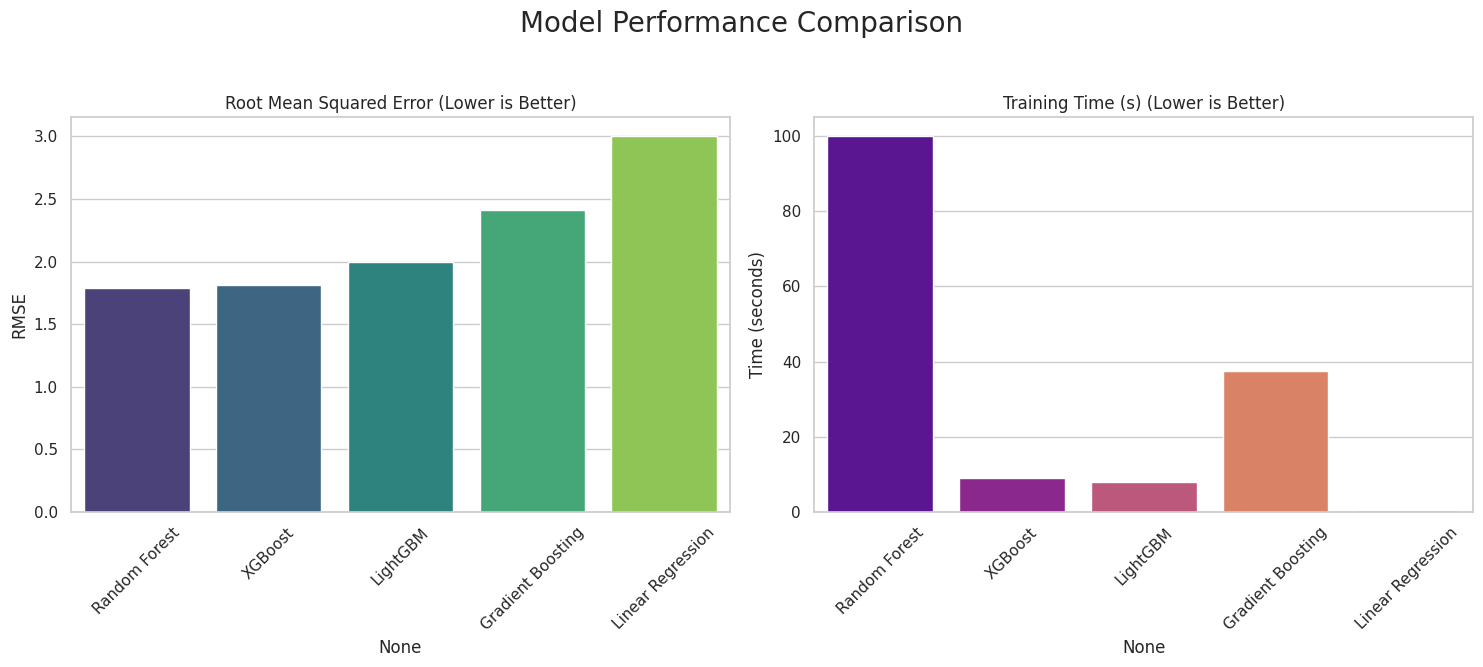

In [12]:
# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.set_theme(style="whitegrid")
fig.suptitle('Model Performance Comparison', fontsize=20)

# Plot 1: RMSE Comparison (Corrected)
sns.barplot(x=results_df.index, y=results_df['RMSE'], hue=results_df.index,
            ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Root Mean Squared Error (Lower is Better)')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Training Time Comparison (Corrected)
sns.barplot(x=results_df.index, y=results_df['Training Time (s)'], hue=results_df.index,
            ax=axes[1], palette='plasma', legend=False)
axes[1].set_title('Training Time (s) (Lower is Better)')
axes[1].set_ylabel('Time (seconds)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [ ]:
# write your answer here

### 1. The best model of the R² and RMSE
Random Forest model is the best performer in terms of accuracy.
- RMSE (Root Mean Squared Error): 1.788
- R² (R-squared): 0.954 (or 95.4%)

### 2. The Random Forest model's performance
- The model's min temperature predictions are only off by about 1.79 degress Celsius. For weather forecasting is a low error.
- This model can explain 95.4% of the variation in the minimum temperature. Also the features are effective at predicting the outcome, and the model has captured the underlying patterns in the data.

## 8. Discuss the model performance based on the plot

In [ ]:
# write your answer here

### Chart 1: Prediction Error (RMSE)
- Winner: Random Forest has the lowest error bar, made the best predictions.
- Very Close Second: XGBoost is just behind it, as very good.
- LightGBM and Gradient Boosting also did very well, interestingly Linear Regression is not too bad.

### Chart 2: Training Speed
- LightGBM and XGBoost are the clear winners in speed. They were over 10 times faster than Random Forest.

In conclusion, for absolute best accuracy without thinking about waiting time, Random Forest is the champion. If need model is both very accurate and fast, XGBoost is the best overall choice.